Niall Carbery 22380966

###
<b>From the given data sets, identify the energy relaxation experiment data, sketch its equivalent quantum
circuit and extract the relaxation times $T_1$ of the thee qubits. Using the graphs, comment on the
meaning of the T1 time. You should fit to $Ae^{−Bt} + C$ to identify the T1 time.</b>

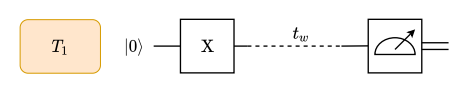

For $T_1$ measurements, starting with a |0> state, a spin-up |1> state is prepared using an X pulse. Then we vary the waiting time of $t_w$ at the single-qubit manipulation 
point before performing single-shot measurement. In this $T_1$ measurement, all three spins are sequentially read out and therefore the visibilities of $Q_1$ and 
$Q_2$ are decreased by $T_1$ relaxation during the readout stage.

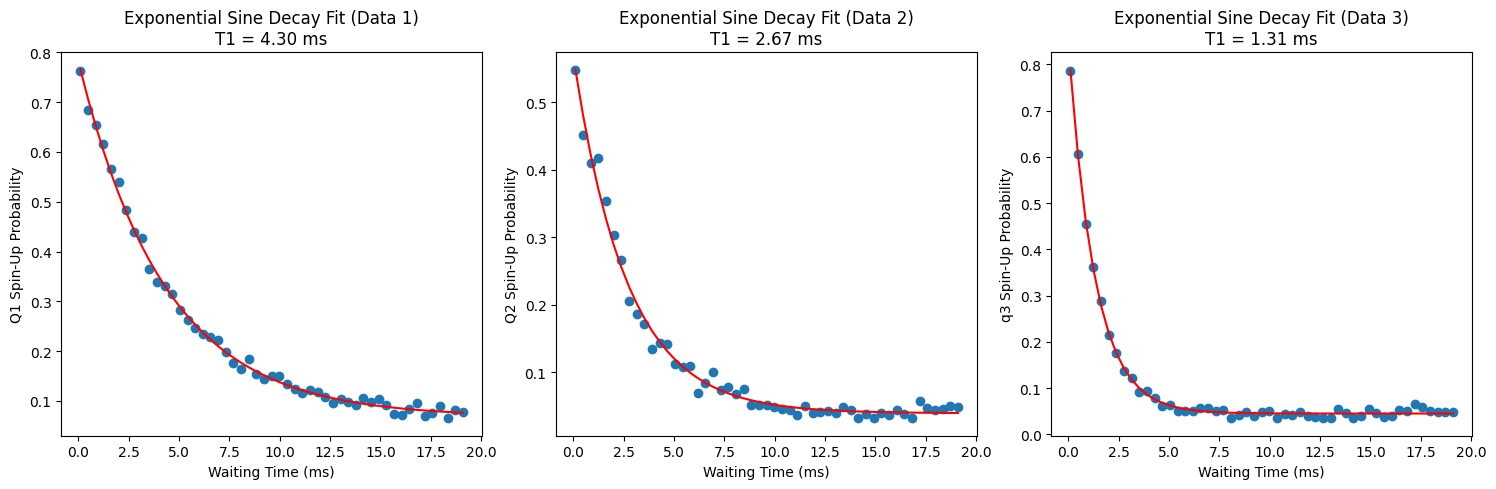

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data1 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2b.csv", delimiter=",", skiprows=1)
waiting_time1 = data1[:, 0]
probability1 = data1[:, 1]

data2 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2c.csv", delimiter=",", skiprows=1)
waiting_time2 = data2[:, 0]
probability2 = data2[:, 1]

data3 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2d.csv", delimiter=",", skiprows=1)
waiting_time3 = data3[:, 0]
probability3 = data3[:, 1]

def exponential_decay(t, A, B, C):
    return A * np.exp(-B * t) + C

params1, covariance1 = curve_fit(exponential_decay, waiting_time1, probability1)
A1, B1, C1 = params1
T1_time1 = 1 / B1

params2, covariance2 = curve_fit(exponential_decay, waiting_time2, probability2)
A2, B2, C2 = params2
T1_time2 = 1 / B2

params3, covariance3 = curve_fit(exponential_decay, waiting_time3, probability3)
A3, B3, C3 = params3
T1_time3 = 1 / B3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(waiting_time1, probability1, label="Data")
axes[0].plot(waiting_time1, exponential_decay(waiting_time1, A1, B1, C1), color="red", label="Fitted Curve")
axes[0].set_xlabel("Waiting Time (ms)")
axes[0].set_ylabel("Q1 Spin-Up Probability")
axes[0].set_title(f"Exponential Sine Decay Fit (Data 1)\nT1 = {T1_time1:.2f} ms")

axes[1].scatter(waiting_time2, probability2, label="Data")
axes[1].plot(waiting_time2, exponential_decay(waiting_time2, A2, B2, C2), color="red", label="Fitted Curve")
axes[1].set_xlabel("Waiting Time (ms)")
axes[1].set_ylabel("Q2 Spin-Up Probability")
axes[1].set_title(f"Exponential Sine Decay Fit (Data 2)\nT1 = {T1_time2:.2f} ms")

axes[2].scatter(waiting_time3, probability3, label="Data")
axes[2].plot(waiting_time3, exponential_decay(waiting_time3, A3, B3, C3), color="red", label="Fitted Curve")
axes[2].set_xlabel("Waiting Time (ms)")
axes[2].set_ylabel("q3 Spin-Up Probability")
axes[2].set_title(f"Exponential Sine Decay Fit (Data 3)\nT1 = {T1_time3:.2f} ms")

plt.tight_layout()
plt.show()


$T_1$ represents the time it takes for a qubit to relax from its excited state |1> to its ground state |0>. This relaxation process is due to interactions with the environment. The graphs show exponential decay behavior of qubits over time.
The fitted curve represents this decay, where the $T_1$ time is the recipocal of the B coefficient in the exponential fit $Ae^{−Bt} + C$ or can be interpested as the point where the probability has reduced to $e^{−1}$ = 0.3679. Longer T1 times are desirable because they allow qubits to retain coherence  for longer.

###
<b>In the data set, identify the Ramsey experiment data, sketch its equivalent quantum circuit, and extract
the dephasing time $T^∗_2$ of the thee qubits. Using the graphs, comment on the meaning of the $T^∗_2$ time
- You should first write a function to extract the envelope of the Ramsey oscillation. This could be
as simple as extracting the peaks of the decaying sinusoid.
- Using the extracted envelope points, you should then fit using $Ae^{−Bt} + C$ to identify the $T^∗_2$ time for all 3 qubits. 
</b>

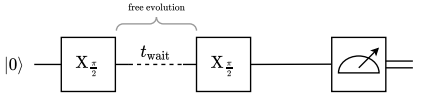

A Ramsey experiment is done to measure a type of $T_2$, denoted $T^∗_2$ which is sensitive to low frequency variations in
the resonant frequency of the qubit. We start in a known state, |0⟩. We then apply a Rx($\frac {\pi} 2$) gate to bring the qubit
onto the equator of the Bloch sphere. The qubit is then allowed to evolve freely for a time $t_{wait}$. During this time the
qubit will rotate around the z-axis at the frequency of the energy gap between the |0⟩ and |1⟩ states. After $t_{wait}$ another
Rx($\frac {\pi} 2$)) gate is applied.


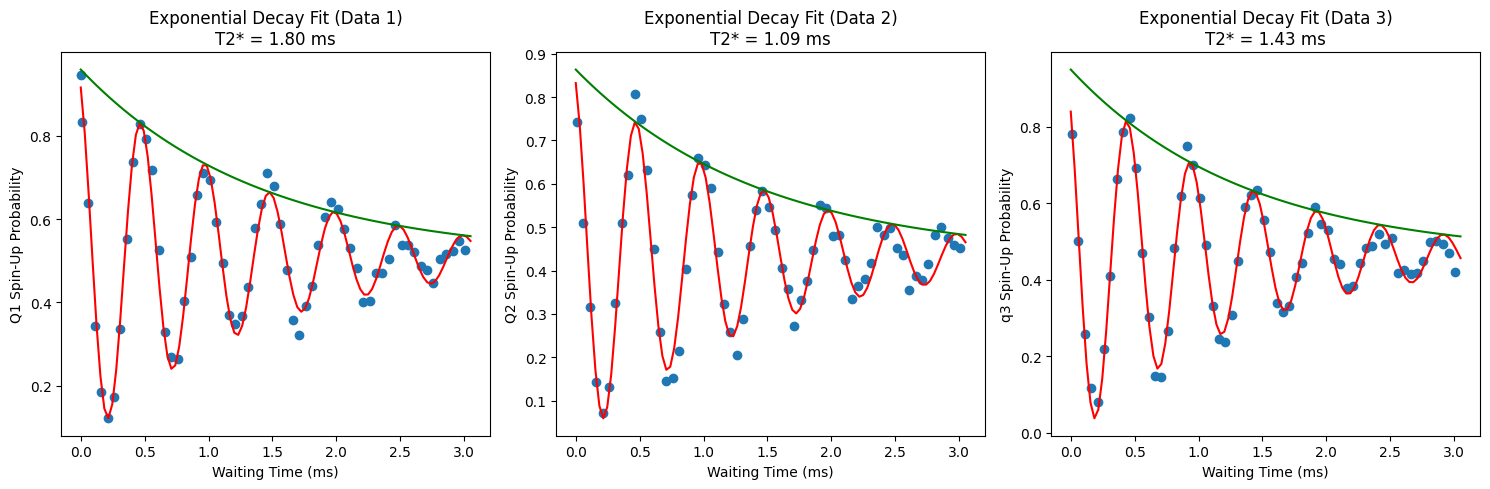

In [4]:
def exponential_sine(t, A, B, C, D, F):
    return A * np.exp(-B * t) * np.sin(C * t + F) + D

data1 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2f.csv", delimiter=",", skiprows=1)
waiting_time1 = data1[:, 0]
probability1 = data1[:, 1]

data2 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2g.csv", delimiter=",", skiprows=1)
waiting_time2 = data2[:, 0]
probability2 = data2[:, 1]

data3 = np.loadtxt("./Homework_Datasets/Takeda_2021_Supplementary_Fig2h.csv", delimiter=",", skiprows=1)
waiting_time3 = data3[:, 0]
probability3 = data3[:, 1]

def Bisection(f, a, b, A, B, D, tol=0.001, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint, A, B, D) > 1-np.exp(-1)):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

x = np.linspace(0,3.05,100)
bounds = ([0, 0, 0, 0, 0 ], [np.inf, np.inf, np.inf, np.inf, np.inf])

params1, covariance1 = curve_fit(exponential_sine, waiting_time1, probability1, bounds=bounds)
A1, B1, C1, D1, F1 = params1
T2_time1 = Bisection(exponential_decay, 1, 2, A1, B1, D1)

params2, covariance2 = curve_fit(exponential_sine, waiting_time2, probability2, bounds=bounds)
A2, B2, C2, D2, F2 = params2
T2_time2 = Bisection(exponential_decay, 1, 2, A2, B2, D2)

params3, covariance3 = curve_fit(exponential_sine, waiting_time3, probability3, bounds=bounds)
A3, B3, C3, D3, F3 = params3
T2_time3 = Bisection(exponential_decay, 1, 2, A3, B3, D3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(waiting_time1, probability1, label="Data")
axes[0].plot(x, exponential_sine(x, A1, B1, C1, D1, F1), color="red", label="Fitted Curve")
axes[0].plot(x, exponential_decay(x, A1, B1, D1), color="green")
axes[0].set_xlabel("Waiting Time (ms)")
axes[0].set_ylabel("Q1 Spin-Up Probability")
axes[0].set_title(f"Exponential Decay Fit (Data 1)\nT2* = {T2_time1:.2f} ms")

axes[1].scatter(waiting_time2, probability2, label="Data")
axes[1].plot(x, exponential_sine(x, A2, B2, C2, D2, F2), color="red", label="Fitted Curve")
axes[1].plot(x, exponential_decay(x, A2, B2, D2), color="green")
axes[1].set_xlabel("Waiting Time (ms)")
axes[1].set_ylabel("Q2 Spin-Up Probability")
axes[1].set_title(f"Exponential Decay Fit (Data 2)\nT2* = {T2_time2:.2f} ms")

axes[2].scatter(waiting_time3, probability3, label="Data")
axes[2].plot(x, exponential_sine(x, A3, B3, C3, D3, F3), color="red", label="Fitted Curve")
axes[2].plot(x, exponential_decay(x, A3, B3, D3,), color="green")
axes[2].set_xlabel("Waiting Time (ms)")
axes[2].set_ylabel("q3 Spin-Up Probability")
axes[2].set_title(f"Exponential Decay Fit (Data 3)\nT2* = {T2_time3:.2f} ms")

plt.tight_layout()
plt.show()

The $T_2$ times were determined by the maximum amplitudes of our exponential sine decay.  The $T_2$ is the rate at which the decay of off-diagonal entries of our density matrix occurs in our qubits. $T_2^*$ is a type of $T_2$ which is sensitive to low frequency variations in the resonant frequency of the qubit. <p>
Our values for the $T_2^*$ are roughly similar to those calculated in the paper, this may be because you used the wrong fitting function for the noise profile whether we are considering a white noise background or a enviroment background. A Gaussian decay mayn be more applicable with this data. The exponenetial decay however is a good appproximation. They do note in the Extended data caption for Fig.2 in the supplementary material for the paper that they fit with a Gaussian decay, which they've decided is most appropriate for the noise their qubit frequency is subject to.

###
<b>In your own words, what is the meaning of the Hahn echo experiment? Do you expect $T^H_2$ be less
or greater than $T^∗_2$? Why? You should do some further research for this question and go beyond the
discussion in the lecture notes.</b>

The Hahn experiment is similar to the Ramsey experiment, however an X rotation gate is added midway through the free evolution time.
This is sometimes referred to as a refocusing pulse, inverting the quantum state. After the inversion, the system continues to evolve for the remaining time. The  refocusing pulse minimizes the effects of long-term drifts and pulse imperfections. Pulse sequences
such as these can be used to characterise the environment of our qubit, getting estimates for T1, T2.
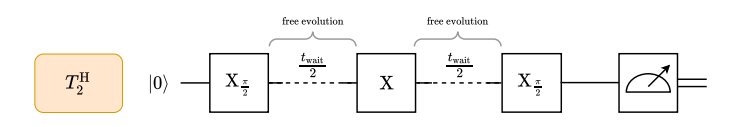

We expect $T^H_2$ to be longer then $T^∗_2$, because the experiemtn is designed to to refocus inhomogeneous dephasing. If the depahsing from the noise is symmetric the X gate simply extends the coherence time. However if the noise is asymmetric the Signal is not fully refocuesd which reducing the coherence time and introduces irreversible dephasing. It is often the noise / enviroment is Assymetric so often therfore $T^H_2$$ to be longer then $T^∗_2$. WE can therefore get an idea of the form of noise from the enviroment by comaring T2 times. (D. Farfurnik, Characterizing spin-bath parameters using conventional and time-asymmetric
Hahn-echo sequences)